## **Case-1:-COVID Vaccination**

World Health Organization is looking for recommendations on their next strategy to increase COVID vaccination rate in the world.

The data for the assignment can be found here :  `https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations`

---
1.   Write a python code to integrate the datasets and showcase through the following visualizations in python:

*   The countries with lowest vaccination rate
*   The growth rate of vaccination in India
*   The countries with highest death rate
*   The vaccination gap between Red and Blue states in United States 
---
2.   You are expected to analyze the data based on which you are expected to help WHO understand what is working well in their current strategy and what needs improvement. Based on areas of improvement, suggest a strategy to boost vaccination rate further. Explain the reasons for your suggestions. 


---
3.   If you meet a random person on the streets of New York, what is the probability that the person has been vaccinated by Astrazeneca vaccine (at least 1 dose). (Make assumptions if required)


---







In [12]:
!pip install plotly
!pip install geopy 
!pip install Nominatim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.geocoders import Nominatim
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
data1 =pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [14]:
data1.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [15]:
data1.tail()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
141110,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
141111,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,NaN,NaN,NaN,105.0,563.0,0.003
141112,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,94.0,462.0,0.003
141113,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,82.0,361.0,0.002
141114,Zimbabwe,ZWE,2022-10-09,12222754.0,6437808.0,4751270.0,1033676.0,NaN,1126.0,74.89,39.45,29.11,6.33,69.0,332.0,0.002


In [16]:
data1.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
count,6.782900e+04,6.481800e+04,6.217300e+04,3.722900e+04,5.623100e+04,1.401740e+05,67829.000000,64818.000000,62173.000000,37229.000000,140174.000000,1.396930e+05,139693.000000
mean,2.988280e+08,1.361486e+08,1.190532e+08,6.523215e+07,8.989455e+05,3.777002e+05,105.471941,48.231627,43.135775,27.694157,2426.208612,1.409638e+05,0.099872
std,1.212847e+09,5.531350e+08,4.965170e+08,2.547032e+08,3.549415e+06,2.254569e+06,80.296312,29.965172,29.500466,26.612359,3451.058690,9.188061e+05,0.199448
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.279636e+06,7.236652e+05,5.970080e+05,1.415140e+05,4.013500e+03,5.700000e+02,28.310000,19.282500,12.790000,1.540000,289.000000,1.330000e+02,0.006000
50%,9.241392e+06,4.683981e+06,4.130163e+06,2.847118e+06,3.078100e+04,6.045500e+03,102.450000,55.840000,47.320000,21.560000,1157.000000,1.732000e+03,0.032000
75%,6.159089e+07,2.900107e+07,2.650604e+07,1.821400e+07,2.309660e+05,4.541275e+04,169.490000,74.910000,69.410000,49.900000,3335.000000,1.536200e+04,0.115000
max,1.298930e+10,5.460611e+09,5.017475e+09,2.628060e+09,4.967822e+07,4.369091e+07,379.200000,128.760000,126.760000,139.610000,117113.000000,2.107286e+07,11.711000


In [17]:
data1.shape

(141115, 16)

In [18]:
data1.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

In [19]:
data1.nunique()

location                                 235
iso_code                                 235
date                                     725
total_vaccinations                     66865
people_vaccinated                      63178
people_fully_vaccinated                60265
total_boosters                         32767
daily_vaccinations_raw                 41111
daily_vaccinations                     57026
total_vaccinations_per_hundred         23466
people_vaccinated_per_hundred           9533
people_fully_vaccinated_per_hundred     9241
total_boosters_per_hundred              8126
daily_vaccinations_per_million         12589
daily_people_vaccinated                40921
daily_people_vaccinated_per_hundred     1392
dtype: int64

In [20]:
data1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         location  iso_code   date  total_vaccinations  people_vaccinated  \
0          False     False  False               False              False   
1          False     False  False                True               True   
2          False     False  False                True               True   
3          False     False  False                True               True   
4          False     False  False                True               True   
...          ...       ...    ...                 ...                ...   
141110     False     False  False               False              False   
141111     False     False  False                True               True   
141112     False     False  False                True               True   
141113     False     False  False                True               True   
141114     False     False  False               False              False   

        people_fully_vacc

In [21]:
data1Processed = data1.sort_values(['date','people_fully_vaccinated_per_hundred'], ascending=[False, True]).drop_duplicates(['location'])
data1max1 = data1Processed.sort_values('people_fully_vaccinated_per_hundred').dropna(subset=['people_fully_vaccinated_per_hundred'])
data1max1


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
20769,Burundi,BDI,2022-11-20,28043.0,26110.0,25526.0,54.0,NaN,124.0,0.22,0.20,0.20,0.00,10.0,123.0,0.001
139929,Yemen,YEM,2022-11-08,1149321.0,917435.0,678732.0,55725.0,NaN,384.0,3.41,2.72,2.01,0.17,11.0,301.0,0.001
54195,Haiti,HTI,2022-10-28,509500.0,397765.0,236678.0,NaN,NaN,2371.0,4.40,3.43,2.04,NaN,205.0,2290.0,0.020
99135,Papua New Guinea,PNG,2022-11-21,693524.0,361900.0,301769.0,29855.0,NaN,901.0,6.84,3.57,2.98,0.29,89.0,408.0,0.004
33645,Democratic Republic of Congo,COD,2022-10-16,6134888.0,5719214.0,3720706.0,NaN,NaN,16348.0,6.20,5.78,3.76,NaN,165.0,17538.0,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,Brunei,BRN,2022-11-11,1282008.0,450287.0,445786.0,338532.0,NaN,123.0,285.52,100.29,99.28,75.40,274.0,8.0,0.002
101493,Pitcairn,PCN,2022-08-29,117.0,47.0,47.0,23.0,NaN,0.0,248.94,100.00,100.00,48.94,0.0,0.0,0.000
132608,United Arab Emirates,ARE,2022-06-20,24922054.0,9991089.0,9792266.0,5138699.0,NaN,848.0,263.97,105.83,103.72,54.43,90.0,0.0,0.000
103577,Qatar,QAT,2022-11-20,7597091.0,2848950.0,2848949.0,1899192.0,NaN,197.0,281.88,105.71,105.71,70.47,73.0,61.0,0.002


In [22]:
geolocator = Nominatim(user_agent="SicMundus")
latList = []
lonList = []
data1max2 = data1max1.drop(data1max1.index[[103,109,183]])
for country in data1max2['location']:
    location = geolocator.geocode(country)
    latList.append(location.latitude)
    lonList.append(location.longitude)

data1max2['latitude'] = latList
data1max2['longitude'] = lonList

In [23]:
fig_city = px.scatter_geo(data1max2,lat='latitude', lon='longitude',scope="world", color="people_fully_vaccinated_per_hundred",
                      hover_name=data1max2['location'],
                      color_continuous_scale='dense',)
#fig_city.update_layout(height=750, width=1000)
fig_city.show()

<BarContainer object of 5 artists>

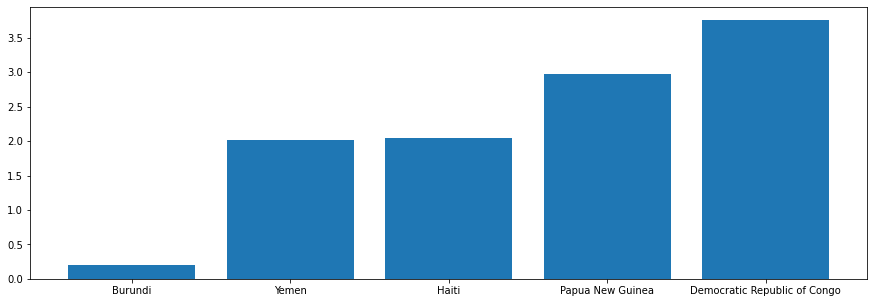

In [24]:
fig = plt.figure(figsize =(15, 5))
plt.bar(data1max1['location'].head(), data1max1['people_fully_vaccinated_per_hundred'].head())

In [25]:
data2=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

In [26]:
data2.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [27]:
data2.tail()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
43871,2022-11-19,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0,911.0,NaN,NaN,NaN
43872,2022-11-20,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0,911.0,NaN,NaN,NaN
43873,2022-11-21,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526.0,909.0,NaN,NaN,NaN
43874,2022-11-22,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526.0,909.0,NaN,NaN,NaN
43875,2022-11-23,Wyoming,833666.0,1218685.0,349841.0,52.74,144.04,305238.0,60.45,210.57,NaN,526.0,909.0,0.684,NaN,NaN


In [28]:
data2.describe()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
count,3.118500e+04,3.092500e+04,3.092100e+04,29376.000000,29475.000000,3.084100e+04,29451.000000,29455.000000,2.844100e+04,4.381100e+04,41468.000000,30925.000000,1.370400e+04,13082.000000
mean,1.149592e+07,1.437570e+07,5.815738e+06,46.465243,111.146500,4.804861e+06,55.614924,138.557374,3.730344e+04,3.016867e+04,2819.906386,0.792373,2.352325e+06,23.636688
std,5.032389e+07,6.314191e+07,2.470844e+07,21.981392,55.847271,2.084327e+07,23.359610,67.482468,1.835939e+05,1.500237e+05,2563.786150,0.114224,1.013698e+07,11.894886
min,4.160000e+02,6.000000e+03,4.010000e+02,0.000000,0.170000,1.000000e+00,0.240000,6.140000,0.000000e+00,0.000000e+00,0.000000,0.043000,8.000000e+00,0.010000
25%,9.002550e+05,1.147355e+06,4.981150e+05,33.220000,72.945000,3.591020e+05,41.540000,93.055000,1.065000e+03,1.644000e+03,1016.000000,0.750000,2.010332e+05,14.970000
50%,3.122632e+06,3.940890e+06,1.706016e+06,51.390000,113.430000,1.324216e+06,59.610000,137.480000,6.832000e+03,6.029000e+03,2008.000000,0.800000,6.691800e+05,23.300000
75%,7.782069e+06,9.711585e+06,3.937561e+06,61.690000,149.510000,3.325732e+06,71.500000,190.420000,2.205400e+04,1.727900e+04,3749.250000,0.854000,1.659406e+06,32.520000
max,6.535026e+08,9.284606e+08,2.678049e+08,89.500000,269.450000,2.283904e+08,111.750000,388.610000,4.629928e+06,3.384387e+06,27652.000000,1.276000,1.113678e+08,56.630000


In [29]:
data2.shape

(43876, 16)

In [30]:
data2.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [31]:
data2.nunique()

date                                     704
location                                  65
total_vaccinations                     29481
total_distributed                      21499
people_vaccinated                      29652
people_fully_vaccinated_per_hundred     7847
total_vaccinations_per_hundred         15073
people_fully_vaccinated                29392
people_vaccinated_per_hundred           8731
distributed_per_hundred                13843
daily_vaccinations_raw                 17335
daily_vaccinations                     21896
daily_vaccinations_per_million          8764
share_doses_used                         923
total_boosters                         12970
total_boosters_per_hundred              4247
dtype: int64

In [32]:
data2.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         date  location  total_vaccinations  total_distributed  \
0      False     False               False              False   
1      False     False               False              False   
2      False     False               False              False   
3      False     False               False              False   
4      False     False                True               True   
...      ...       ...                 ...                ...   
43871  False     False                True               True   
43872  False     False                True               True   
43873  False     False                True               True   
43874  False     False                True               True   
43875  False     False               False              False   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
0                  False                                False   
1                  False   

Red States(States that supported republican candidate):

Alabama, Alaska, Arkansas, Florida, Idaho, Indiana, Iowa,  Kansas,  Kentucky,  Louisiana, Mississippi, Missouri, Montana, Nebraska,  North Carolina, North Dakota, Ohio, Oklahoma,  South Carolina, South Dakota, Tennessee, Texas, Utah,  West Virginia, Wyoming.


---



Blue States(States that supportes democratic candidate):

Arizona, California, Colorado, Connecticut, Delaware, District of Columbia, Georgia, Hawaii, Illinois, Maine, Maryland,  Massachusetts,  Michigan,  Minnesota, Nevada, New Hampshire, New Jersey, New Mexico,  New York, Oregon, Pennsylvania, Rhode Island,  Vermont, Virginia, Washington, Wisconsin 


---



In [33]:
data2Processed = data2.sort_values(['date','people_fully_vaccinated_per_hundred'], ascending=[False, True]).drop_duplicates(['location'])
data2max1 = data2Processed.sort_values('people_fully_vaccinated_per_hundred').dropna(subset=['people_fully_vaccinated_per_hundred'])
data2max1


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
13619,2022-11-23,Indian Health Svc,2483256.0,3785495.0,1149077.0,43.62,119.23,908565.0,55.17,181.75,NaN,2050.0,984.0,0.656,NaN,NaN
18655,2022-11-23,Marshall Islands,92665.0,150880.0,42920.0,44.13,119.20,34305.0,55.21,194.08,NaN,0.0,0.0,0.614,NaN,NaN
680,2022-11-23,Alabama,6765053.0,11720840.0,3164265.0,52.72,137.97,2585033.0,64.53,239.05,NaN,2004.0,409.0,0.577,NaN,NaN
43875,2022-11-23,Wyoming,833666.0,1218685.0,349841.0,52.74,144.04,305238.0,60.45,210.57,NaN,526.0,909.0,0.684,NaN,NaN
22060,2022-11-23,Mississippi,4203811.0,6839565.0,1825672.0,53.43,141.25,1590287.0,61.34,229.81,NaN,2032.0,683.0,0.615,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,2022-11-23,Guam,386614.0,367510.0,157888.0,85.08,229.46,143346.0,93.71,218.12,NaN,158.0,938.0,1.052,NaN,NaN
33637,2022-11-23,Republic of Palau,50791.0,50390.0,20693.0,85.64,235.89,18441.0,96.10,234.02,NaN,13.0,604.0,1.008,NaN,NaN
32956,2022-11-23,Puerto Rico,7921098.0,8414900.0,3133843.0,86.60,248.02,2765802.0,98.13,263.48,NaN,4160.0,1303.0,0.941,NaN,NaN
34318,2022-11-23,Rhode Island,2564477.0,3314725.0,1112897.0,86.90,242.08,920559.0,105.05,312.90,NaN,2020.0,1907.0,0.774,NaN,NaN


In [34]:
geolocator = Nominatim(user_agent="SicMundus")
latList2 = []
lonList2 = []
data2max2 = data2max1.drop(data2max1.index[[0]])
for state in data2max2['location']:
    location = geolocator.geocode(state)
    latList2.append(location.latitude)
    lonList2.append(location.longitude)

data2max2['latitude'] = latList2
data2max2['longitude'] = lonList2

In [35]:
fig_city = px.scatter_geo(data2max2,lat='latitude', lon='longitude',scope="usa", color="people_fully_vaccinated_per_hundred",
                      hover_name=data2max2['location'],
                      color_continuous_scale='dense',)
#fig_city.update_layout(height=750, width=1000)
fig_city.show()

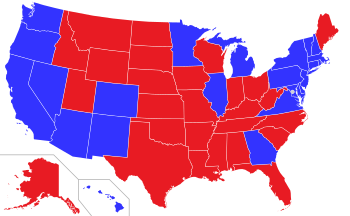

From above graph and image comparison its clear that Red states have less vaccination rate while blue states have higher vaccination rates

Vaccination Rate in India

In [36]:
data_new = data1[data1['location'] == 'India']
 
print(data_new)

      location iso_code        date  total_vaccinations  people_vaccinated  \
57337    India      IND  2021-01-15        0.000000e+00       0.000000e+00   
57338    India      IND  2021-01-16        1.911810e+05       1.911810e+05   
57339    India      IND  2021-01-17        2.243010e+05       2.243010e+05   
57340    India      IND  2021-01-18        4.540490e+05       4.540490e+05   
57341    India      IND  2021-01-19        6.748350e+05       6.748350e+05   
...        ...      ...         ...                 ...                ...   
58013    India      IND  2022-11-22        2.198697e+09       1.027008e+09   
58014    India      IND  2022-11-23        2.198774e+09       1.027015e+09   
58015    India      IND  2022-11-24        2.198861e+09       1.027021e+09   
58016    India      IND  2022-11-25        2.198939e+09       1.027026e+09   
58017    India      IND  2022-11-26        2.199013e+09       1.027032e+09   

       people_fully_vaccinated  total_boosters  daily_vaccinati

In [37]:
data1_in = data_new.sort_values(['date','people_fully_vaccinated_per_hundred'], ascending=[False, True])
data1max1 = data1_in.sort_values('people_fully_vaccinated_per_hundred').dropna(subset=['people_fully_vaccinated_per_hundred'])
data1max1


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
57366,India,IND,2021-02-13,8.052454e+06,8.044786e+06,7668.0,NaN,84807.0,325305.0,0.57,0.57,0.00,NaN,230.0,324209.0,0.023
57368,India,IND,2021-02-15,8.516771e+06,8.418653e+06,98118.0,NaN,NaN,322538.0,0.60,0.59,0.01,NaN,228.0,308521.0,0.022
57370,India,IND,2021-02-17,9.186757e+06,8.844641e+06,342116.0,NaN,329416.0,309949.0,0.65,0.62,0.02,NaN,219.0,261075.0,0.018
57369,India,IND,2021-02-16,8.857341e+06,8.641002e+06,216339.0,NaN,340570.0,320826.0,0.63,0.61,0.02,NaN,226.0,289920.0,0.020
57371,India,IND,2021-02-18,9.846523e+06,9.381591e+06,464932.0,NaN,659766.0,334502.0,0.69,0.66,0.03,NaN,236.0,268083.0,0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58010,India,IND,2022-11-19,2.198537e+09,1.026990e+09,950588586.0,220958874.0,89528.0,91461.0,155.14,72.47,67.08,15.59,65.0,5697.0,0.000
58012,India,IND,2022-11-21,2.198619e+09,1.026999e+09,950609941.0,221010377.0,15477.0,87527.0,155.14,72.47,67.08,15.60,62.0,6027.0,0.000
58011,India,IND,2022-11-20,2.198604e+09,1.026997e+09,950606106.0,221001164.0,66731.0,89306.0,155.14,72.47,67.08,15.59,63.0,5969.0,0.000
58013,India,IND,2022-11-22,2.198697e+09,1.027008e+09,950630587.0,221058758.0,77549.0,81861.0,155.15,72.47,67.08,15.60,58.0,6326.0,0.000


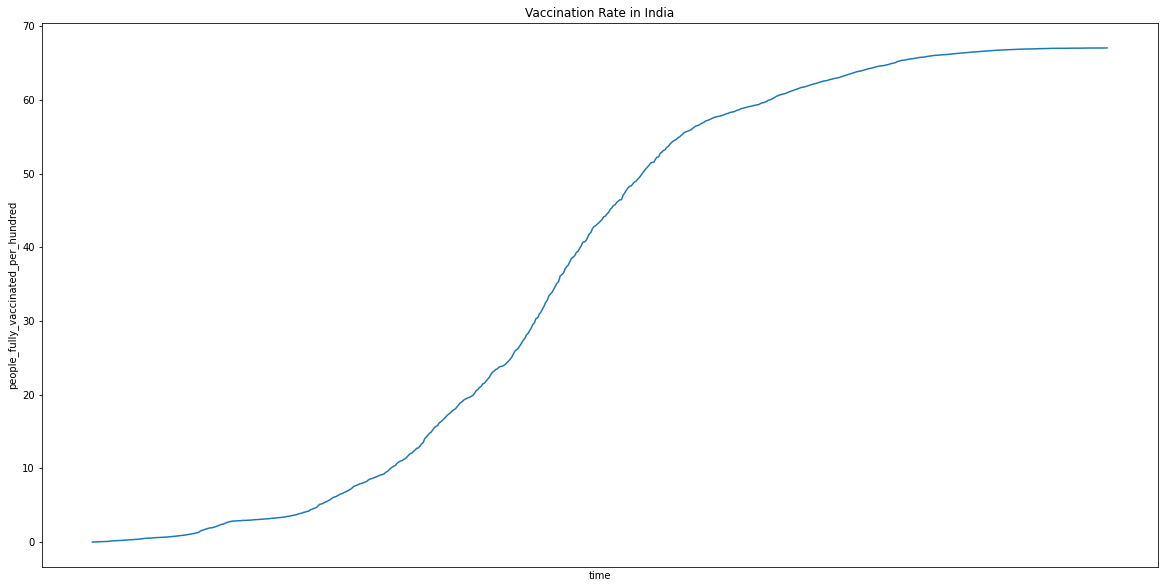

In [53]:
x_axis = 'time'
y_axis = 'people_fully_vaccinated_per_hundred'

plt.figure(figsize=(20, 10))
plt.plot(data1max1['date'], data1max1['people_fully_vaccinated_per_hundred'])
plt.title('Vaccination Rate in India')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.xticks([])

plt.show()

Countries with highest death rate

In [54]:
data3=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [57]:
data3Processed = data3.sort_values(['date','total_deaths_per_million'], ascending=[False, False]).drop_duplicates(['location'])
data3max1 = data3Processed.sort_values('total_deaths_per_million', ascending= False).dropna(subset=['total_deaths_per_million'])
data3max2 = data3max1[['iso_code','location','date','total_deaths','total_deaths_per_million']]
data3max2

,iso_code,location,date,total_deaths,total_deaths_per_million
169334,PER,Peru,2022-11-27,217353.0,6383.425
33016,BGR,Bulgaria,2022-11-27,38027.0,5607.085
28073,BIH,Bosnia and Herzegovina,2022-11-27,16200.0,5010.005
96103,HUN,Hungary,2022-11-27,48245.0,4840.326
157918,MKD,North Macedonia,2022-11-27,9568.0,4570.105
...,...,...,...,...,...
41999,TCD,Chad,2022-11-27,194.0,10.946
127388,MAC,Macao,2022-11-27,6.0,8.631
44049,CHN,China,2022-11-27,5232.0,3.669
34981,BDI,Burundi,2022-11-27,38.0,2.948


In [60]:
geolocator = Nominatim(user_agent="SicMundus")
latList3 = []
lonList3 = []
#counter = 0
data3max3 = data3max2.drop(data3max2.index[[103,143]])
for state in data3max3['location']:
    location = geolocator.geocode(state)
    #print(location, counter)
    #counter+=1
    latList3.append(location.latitude)
    lonList3.append(location.longitude)

data3max3['latitude'] = latList3
data3max3['longitude'] = lonList3

In [61]:
fig_city = px.scatter_geo(data3max3,lat='latitude', lon='longitude',scope="world", color="total_deaths_per_million",
                      hover_name=data3max3['location'],
                      color_continuous_scale='dense',)
#fig_city.update_layout(height=750, width=1000)
fig_city.show()

From graphs it is evident that South African countries require assistance in procuring vaccines and increase awareness where as Europe had worst effect of corona as Death rate was highest in European countries thus WHO can impose travel restriction more strictly

3) If you meet a random person on the streets of New York, what is the probability that the person has been vaccinated by Astrazeneca vaccine (at least 1 dose). (Make assumptions if required)

Ans. 
 

*   In the dataset provided for the US vaccination we couldn't find usage(numbers) for the vaccine Astrazenca.
*   On searching Google, I came to know that Astrazenca vaccine is banned in US.


*   Hence, the probability that a person in New York has been vaccinated with Astrazenca is 0.







